In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('car data.csv')

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
df.shape

(301, 9)

In [15]:
#categorical variables
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [16]:
##Check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [18]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [19]:
#car_name is not needed
final_dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [20]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
final_dataset['Current_Year'] = 2020 #how old = (current_Year - Year)

In [22]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [23]:
final_dataset['Age_of_car'] = final_dataset['Current_Year'] - final_dataset['Year']

In [24]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age_of_car
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [25]:
final_dataset.drop(['Year'],axis = 1, inplace = True)

In [26]:
final_dataset.drop(['Current_Year'],axis = 1, inplace = True)

In [27]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age_of_car
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [28]:
#creating dummy variable
final_dataset = pd.get_dummies(final_dataset, drop_first = True) #drop the first column to avoid dummy variable trap

In [29]:
final_dataset.head() #CNG type is not there as we drop the first type

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [30]:
#corelation
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age_of_car,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [31]:
import seaborn as sns

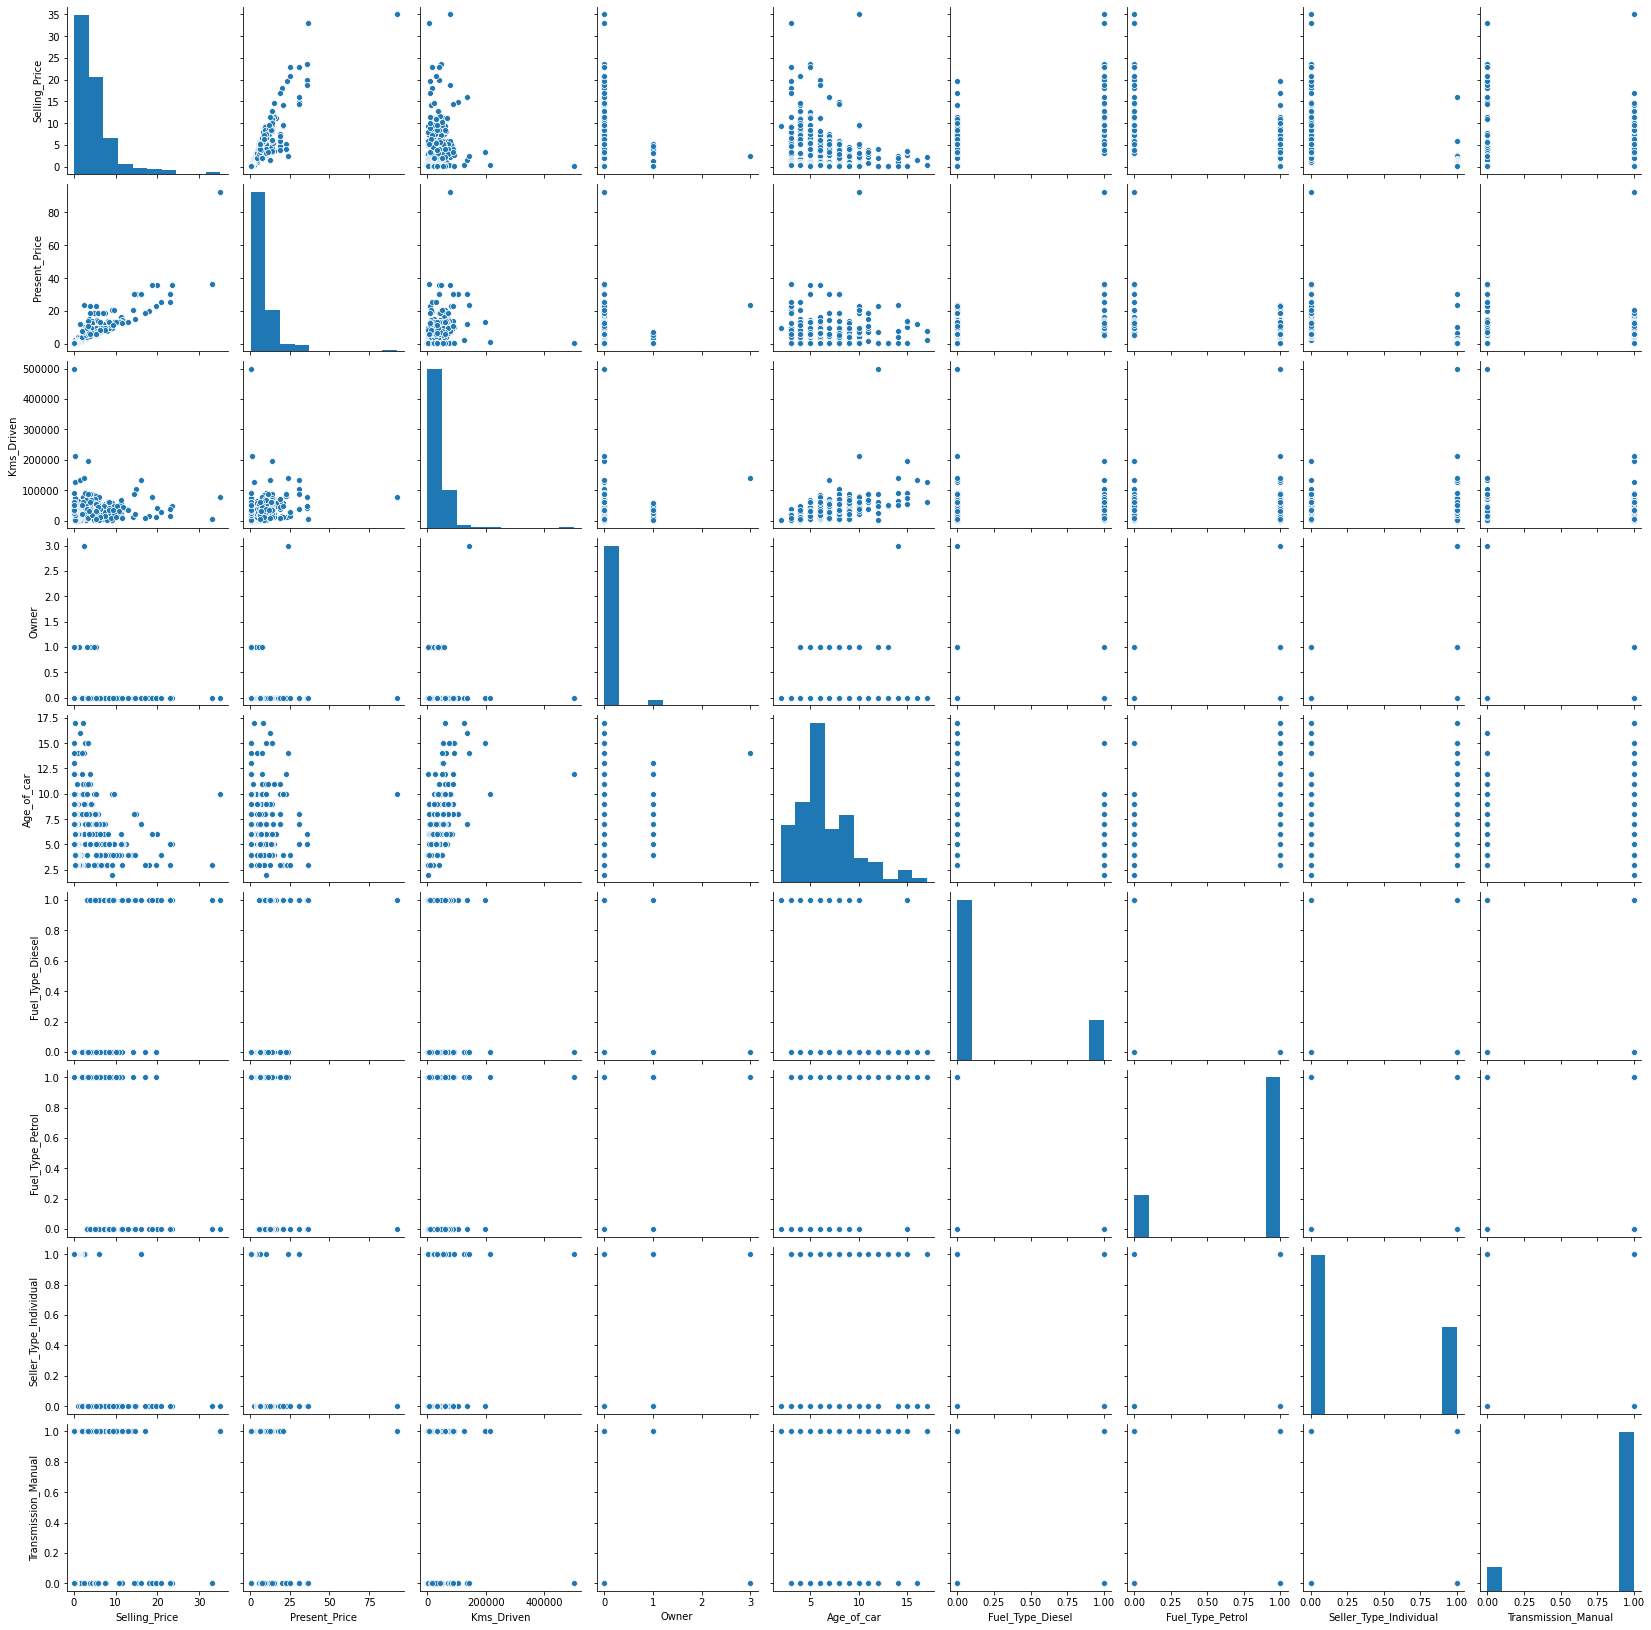

In [32]:
sns.pairplot(final_dataset)

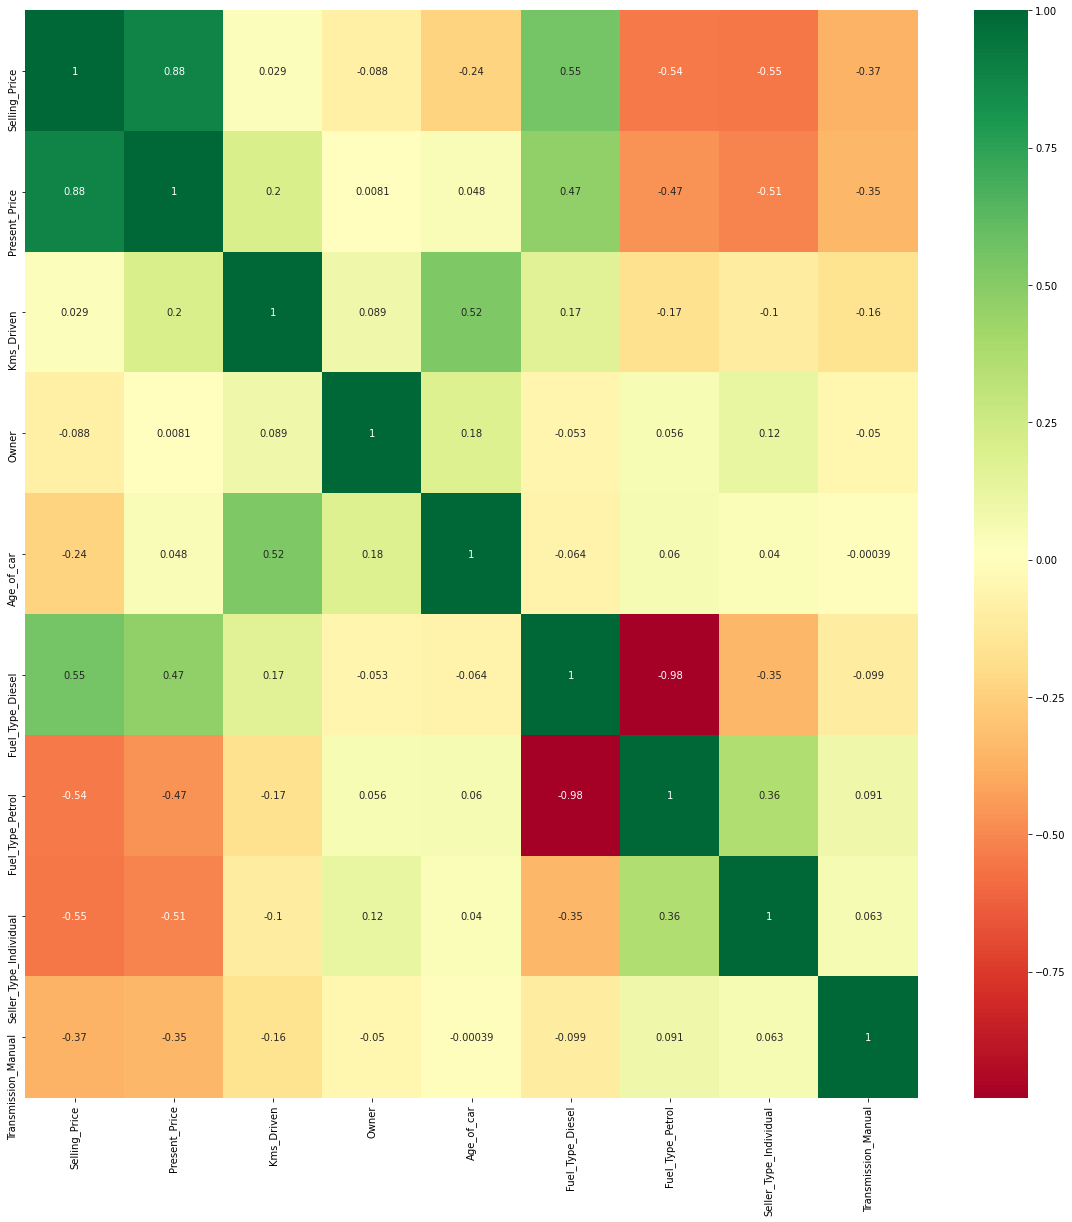

In [33]:
#plot hetmap
corrmap = final_dataset.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20, 20))
#plot heat map 
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn") #green= positively correlated, red=negatively correlated

In [34]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [35]:
#selling price is the dependent feature everything else is independent feature
X = final_dataset.iloc[:,1:] #other columns
y = final_dataset.iloc[:,0] #Selling_Price

In [36]:
X.head()

,Present_Price,Kms_Driven,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [37]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [38]:
###Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [39]:
print(model.feature_importances_)

[0.39622756 0.03901614 0.00065083 0.07865988 0.2116938  0.01566092
 0.12839361 0.12969726]


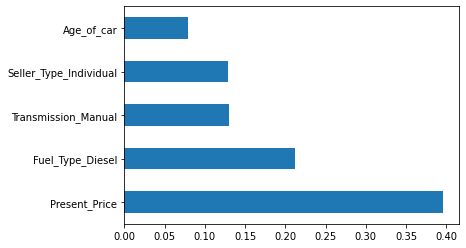

In [40]:
#plot graphs of feature_importeances for better visualisation
feature_importances = pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(5).plot(kind = 'barh')
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2)

In [42]:
X_train.shape

(240, 8)

In [43]:
X_train

,Present_Price,Kms_Driven,Owner,Age_of_car,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
285,8.500,15059,0,4,0,1,0,0
269,10.000,18828,0,5,0,1,0,1
96,25.390,29000,0,4,1,0,0,0
150,0.826,6000,0,9,0,1,1,1
202,5.700,28200,0,5,0,1,0,1
...,...,...,...,...,...,...,...,...
251,9.900,56701,0,7,0,1,0,1
109,1.470,11000,0,3,0,1,1,1
256,13.600,49562,0,4,0,1,0,1
137,0.787,16000,0,7,0,1,1,1


In [44]:
#Random forest Regression 
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()


In [45]:
###Hypreparameters
#selecting different dicision trees from 100 to 1200
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [46]:
#Randomized search CV

#number of trees in RandomeForest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#Number of features to consider in every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
#minimum number of samples required to split a node
min_samples_split = [2, 5,10, 15, 100]
#Minimum number of samples requires in each leaf node
min_samples_leaf = [1, 2 ,5, 10]

In [47]:
from sklearn.model_selection import RandomizedSearchCV
#helps to find out the best parameters considering how many max_features, max_depth etc.----RandomzedSearchCV is fast

In [48]:
#Create the random grid #key-value pair
random_grid = {'n_estimators' : n_estimators,
                'max_features' : max_features,
                'max_depth' : max_depth,
                'min_samples_split' : min_samples_split,
                'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [49]:
#Use the random grid to search  best hyper parameters
#First create the best model to tune
rf = RandomForestRegressor()

In [52]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state = 42, n_jobs =1)
#n_iter = no. of iterations, cv = cross validation, verbose = for displying the details

In [53]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   55.6s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [54]:
predictions = rf_random.predict(X_test)

In [55]:
predictions

array([16.84152765,  0.34570447, 19.17007799,  6.46049017,  0.33612852,
       20.76059701,  7.29352676,  6.63969855,  6.82592114,  0.70549488,
        7.94229034,  0.42909781,  0.61550122,  9.86718947, 19.15845121,
        1.1749146 ,  7.36060456,  3.13665504,  4.88638781,  8.24655713,
       20.49385127,  5.85596303,  4.93219087,  1.98166063,  3.01085387,
        1.065548  ,  2.73747572,  3.92273813,  5.50312979,  7.91511408,
       10.11552294,  0.45007443,  5.48430156,  2.93810851,  1.07769373,
       19.83427022,  0.75264324,  1.09400891,  4.14047438,  9.90128754,
        5.92581633,  2.1797802 ,  2.95654241,  2.77255491,  4.35621109,
       18.18510314,  6.63208705,  0.44981479,  1.21461964,  2.54726253,
        8.88210596,  9.3915451 ,  3.95379075,  1.22200511,  9.91161721,
        4.72537682, 10.46280498,  4.42134124,  1.17257031,  3.84254378,
        6.53218433])

<AxesSubplot:xlabel='Selling_Price'>

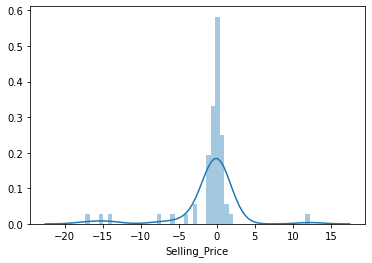

In [57]:
sns.distplot(y_test-predictions) #graph should look like a normal distribution

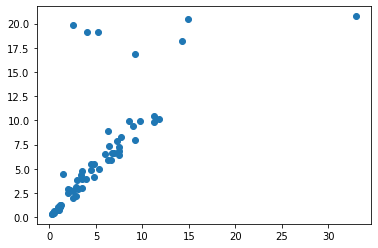

In [59]:
plt.scatter(y_test, predictions) #linearly- prediction is good

In [61]:
#pickle this file
import pickle
#open the file where to store the data
file = open('random_forest_regression.pkl','wb')

#dump information to that file
pickle.dump(rf_random, file)
#one pkl file is created